Feature selection

Today we are going to experiment with feature selection. We will create a few different models and see if we can improve/maintain the same performance with a subset of features.

In [1]:
# Create dataset
# Vi kan se att vi har ett dataset med 1000 rader, 10 kolumner, 5 av våra features är kassa och 5 är bra

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
print(X.shape, y.shape)

(1000, 10) (1000,)


**Create a model**

In [2]:
# We start with a random forest model, here we can evaluate the importance of each feature in the model
# with feature_importances_ attribuet

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importance = rf_model.feature_importances_

In [3]:
# Inspect feature importances

importance

array([0.04150628, 0.09891617, 0.0603883 , 0.27042094, 0.12803106,
       0.07157635, 0.07179852, 0.1318597 , 0.04484533, 0.08065736])

Feature: 0, Score: 0.04151
Feature: 1, Score: 0.09892
Feature: 2, Score: 0.06039
Feature: 3, Score: 0.27042
Feature: 4, Score: 0.12803
Feature: 5, Score: 0.07158
Feature: 6, Score: 0.07180
Feature: 7, Score: 0.13186
Feature: 8, Score: 0.04485
Feature: 9, Score: 0.08066


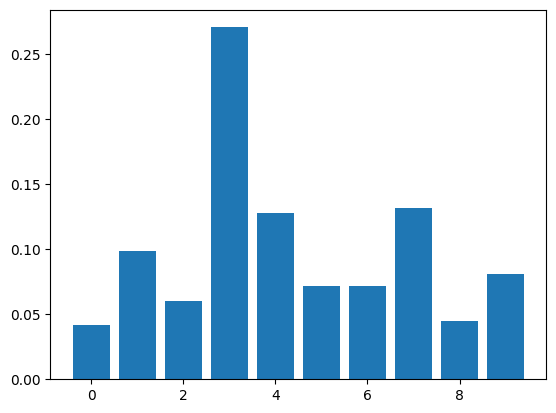

In [4]:
from matplotlib import pyplot as plt

# Print the feature performance prettier

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Creating a model using the best features**

In [10]:
# Vi vill nu ta bort de features som inte är informativa
# vi kan göra detta genom att använda SelectFromModel

from sklearn.feature_selection import SelectFromModel

# Write a function that selects the most important features

def select_features(X_train, y_train, X_test):
    # Find a good subset of features

    fs = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=0.08)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    print('X_train_fs shape: ', X_train_fs.shape, 'X_train shape: ', X_train.shape)
    X_test_fs = fs.transform(X_test)
    print('X_test_fs shape: ', X_test_fs.shape, 'X_test shape: ', X_test.shape)

    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Vi kan nu se att vi fått ut 5 features som är de mest informativa



X_train_fs shape:  (700, 5) X_train shape:  (700, 10)
X_test_fs shape:  (300, 5) X_test shape:  (300, 10)


In [11]:
from sklearn.metrics import classification_report

# Vi kan nu träna en ny modell med de nya featuresen

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fs, y_train)

y_pred = rf.predict(X_test_fs)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       144
           1       0.93      0.90      0.92       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [9]:
# VI kan skapa en modell msom jämför de 3 featuresen med de alla 10 featuresen

rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)

y_pred_all_features = rf_all_features.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred_all_features))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       144
           1       0.95      0.93      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

